<a href="https://colab.research.google.com/github/Ahtesham519/Genrative_Deep_learning_v2_2023/blob/main/Multilayer_Perception_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers , utils , datasets

#0. Parameters

In [2]:
NUM_CLASSES = 10

#1. Prepare the Data

In [3]:
(x_train, y_train) , (x_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


#2. Build the model

In [6]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation = "relu")(x)
x = layers.Dense(150, activation = "relu")(x)

output_layer = layers.Dense(NUM_CLASSES , activation = "softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#3. Train the model

In [7]:
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(
    loss = "categorical_crossentropy" , optimizers = opt , metrics = ["accuracy"]
)

TypeError: Invalid keyword argument(s) in `compile()`: ({'optimizers'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [8]:
model.fit(x_train, y_train , batch_size = 32, epoch = 10, shuffle = True)

TypeError: Model.fit() got an unexpected keyword argument 'epoch'

#4. Evaluation

In [9]:
model.evaluate(x_test , y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [10]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",

    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 4ms/step


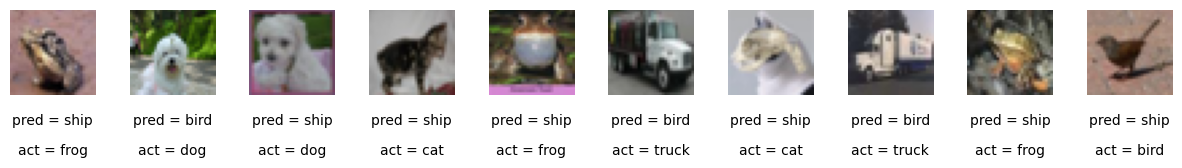

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4 , wspace = 0.4)

for i , idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i + 1)
  ax.axis("off")
  ax.text(
      0.5,
      -0.35,
      "pred = " + str(preds_single[idx]),
      fontsize = 10,
      ha = "center",
      transform = ax.transAxes,
  )
  ax.text(
      0.5,
      -0.7,
      "act = " + str(actual_single[idx]),
      fontsize = 10,
      ha = "center",
      transform = ax.transAxes,
  )
  ax.imshow(img)